# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


# Load dataset

In [2]:
df = pd.read_csv("data_set_for_decision_tree.csv")


# Display dataset

In [3]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


## Encode categorical features using OneHotEncoder

In [6]:
# Ensure column names have no leading/trailing spaces
df.columns = df.columns.str.strip()

In [7]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('income')  # Keep 'income' as target

# Transform categorical features

In [8]:
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate encoded features with original dataset

In [9]:
# Concatenate encoded features with original dataset
final_df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Convert target variable to binary (<=50K as 0, >50K as 1)

In [10]:
# Convert target variable to binary (<=50K as 0, >50K as 1)
final_df['income'] = final_df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


# Split dataset into training and testing sets

In [11]:
# Split dataset into training and testing sets
X = final_df.drop(columns=['income'])
y = final_df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initialize and train Decision Tree Classifier

In [13]:
# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=45)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=45)

# Make predictions

In [14]:
# Make predictions
y_pred = dt.predict(X_test)


# Compute accuracy

In [15]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8274


# Print classification report

In [16]:
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4990
           1       0.64      0.59      0.61      1523

    accuracy                           0.83      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513



# Compute and plot confusion matrix

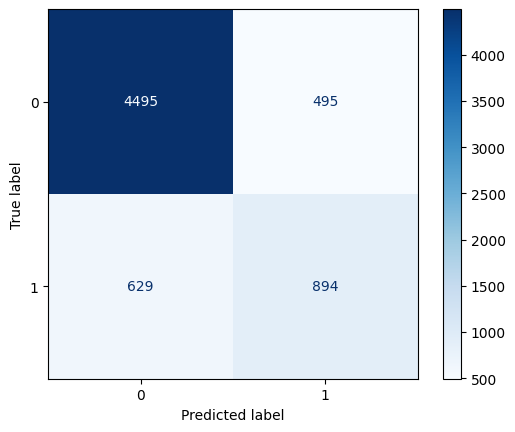

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

# Plot feature importance

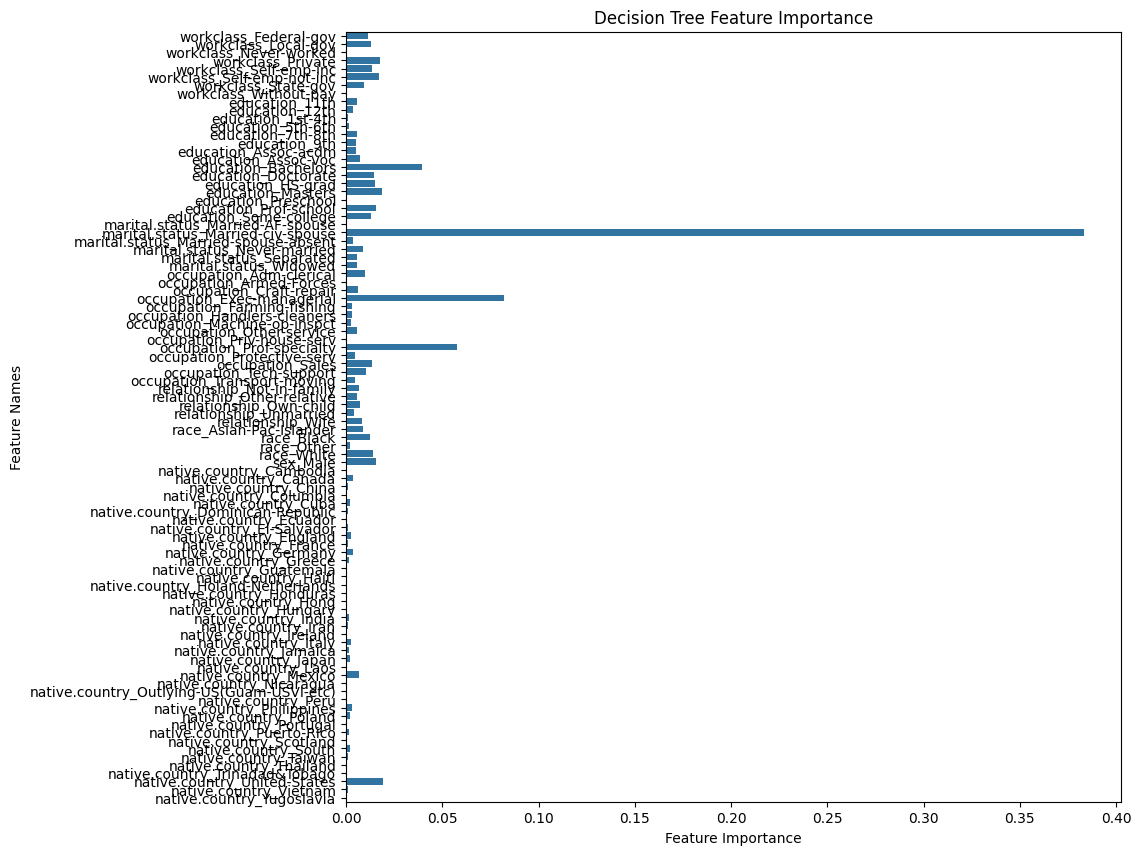

In [19]:
# Plot feature importance
plt.figure(figsize=(10, 10))
importances = dt.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Decision Tree Feature Importance")
plt.show()


In [23]:
from sklearn.tree import plot_tree  # Explicitly importing plot_tree


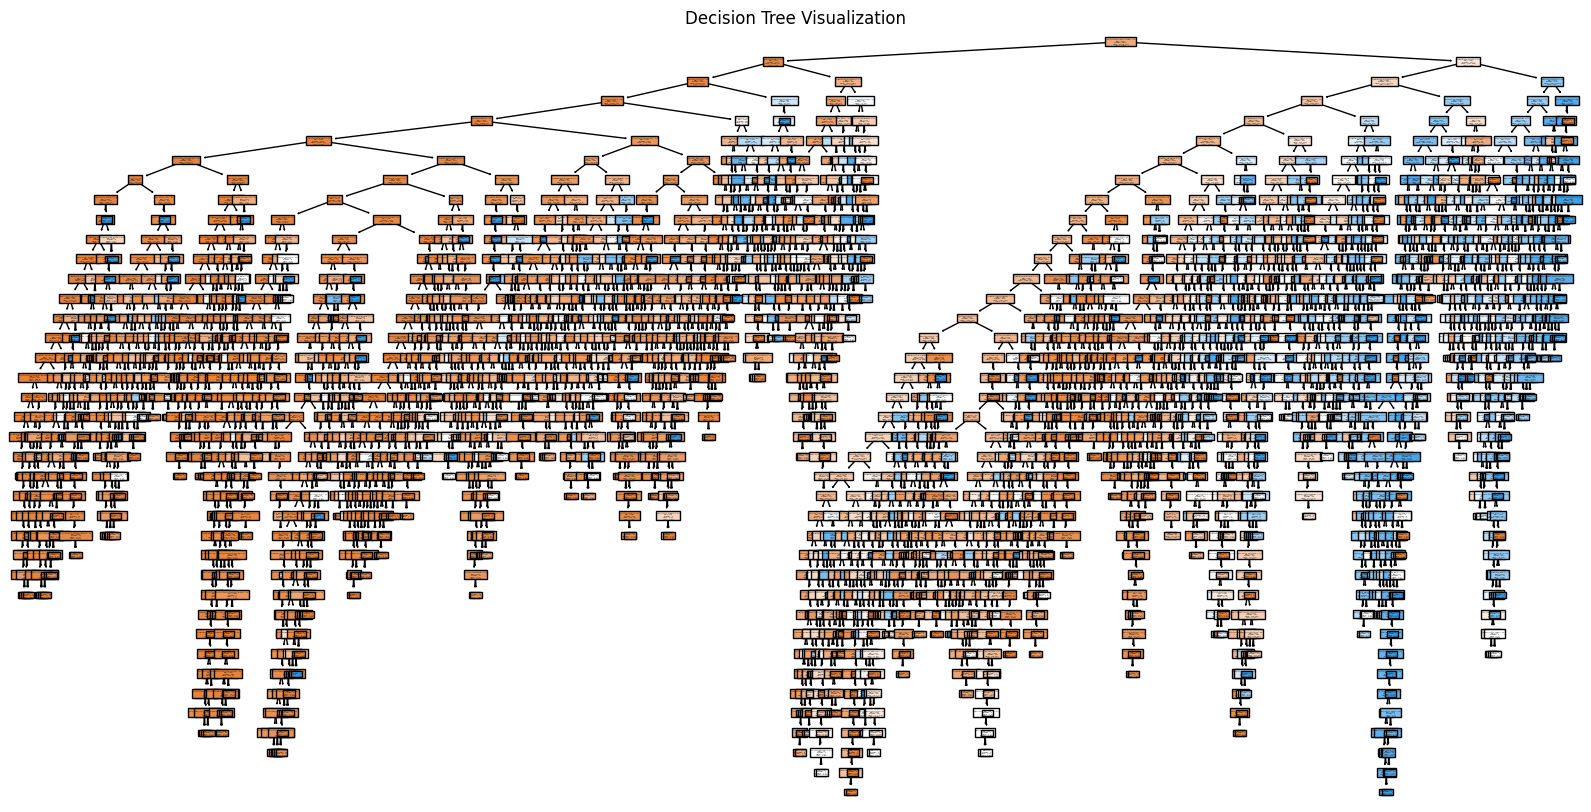

In [24]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'])
plt.title("Decision Tree Visualization")
plt.show()